In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [58]:
df = pd.read_csv("/content/train.csv",index_col = 0)
df.head(20)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
6,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
7,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
8,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
9,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.shape


(768, 8)

In [59]:
df['Cover_Type'].value_counts()


Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7848 entries, 1 to 7848
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           7848 non-null   int64  
 1   Aspect                              7848 non-null   int64  
 2   Slope                               7848 non-null   int64  
 3   Horizontal_Distance_To_Hydrology    7848 non-null   int64  
 4   Vertical_Distance_To_Hydrology      7848 non-null   int64  
 5   Horizontal_Distance_To_Roadways     7848 non-null   int64  
 6   Hillshade_9am                       7848 non-null   int64  
 7   Hillshade_Noon                      7848 non-null   int64  
 8   Hillshade_3pm                       7848 non-null   int64  
 9   Horizontal_Distance_To_Fire_Points  7848 non-null   int64  
 10  Wilderness_Area1                    7848 non-null   int64  
 11  Wilderness_Area2                    7848 non-nul

In [60]:
df.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [61]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [62]:
df.dropna(inplace=True)

In [63]:
df.groupby('Cover_Type').mean()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,1994.412963,...,0.052778,0.106481,0.085185,0.000000,0.001389,0.000000,0.000000,0.037037,0.036574,0.022685
2,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,2155.277315,...,0.044907,0.118056,0.085185,0.005556,0.000463,0.000926,0.000000,0.003241,0.001389,0.001389
3,2398.423148,173.672685,20.628704,210.723148,64.081944,969.595833,201.655556,216.561111,141.549537,916.909722,...,0.000000,0.002315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2223.420370,138.099537,18.468519,104.537500,40.143519,915.100463,227.968056,216.889815,111.808796,860.540741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2786.801389,137.992130,16.724537,208.873148,50.871296,1329.318519,223.368981,218.317130,121.392593,1530.388889,...,0.040278,0.046296,0.053241,0.001852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2423.276852,180.617130,18.986111,160.095370,44.873611,1064.980556,193.562963,209.960648,147.682407,1057.654167,...,0.003241,0.013889,0.030556,0.000926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3362.769907,155.794444,14.166667,346.904630,68.945833,2713.659722,216.639815,222.412037,136.193981,2062.847222,...,0.012500,0.032407,0.031019,0.001852,0.045370,0.003704,0.015741,0.296759,0.266204,0.188426


In [79]:
XSample=df.copy()
XSample=XSample.drop(["Cover_Type"],axis=1) #satisfaction skor XSample da olmaması lazım diye sildik çünkü (o ySample da)
ySample=df.iloc[:,54]
print(XSample.shape)
print(ySample.shape)

(15120, 54)
(15120,)


                                    Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   
Wilderness_Area1                     0.330417 -0.131262 -0.152820   
Wilderness_Area2                     0.261729  0.028238 -0.065923   
Wilderness_Area3                     0.354025  0.032578 -0.113033   
Wilderness_Area4                  

<Axes: >

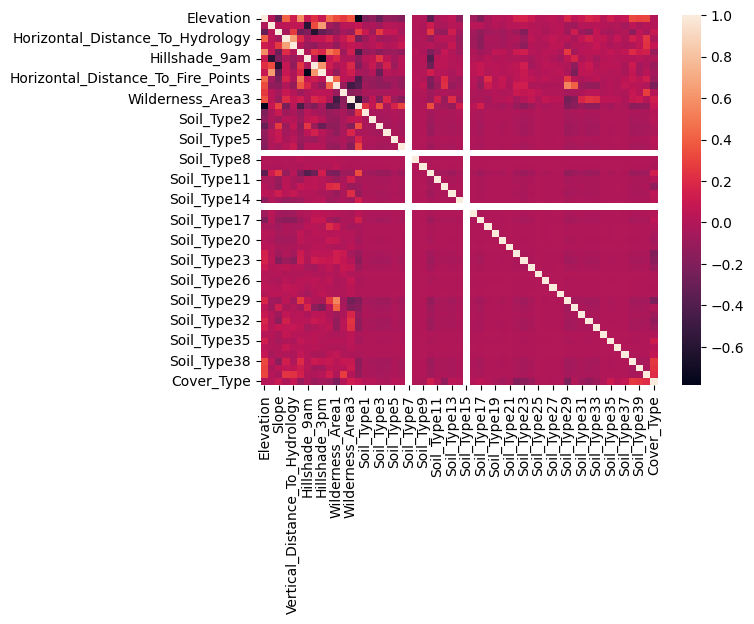

In [80]:
# Korelasyonu hesaplamadan önce yalnızca sayısal sütunları seçin
numerical_df = df.select_dtypes(include=['float', 'int'])
print(numerical_df.corr())
sns.heatmap(numerical_df.corr())

In [81]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

ySample = le.fit_transform(ySample)
print(ySample)

[4 4 1 ... 2 2 2]


In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in XSample:
  XSample[column] = le.fit_transform(XSample[column])

print(XSample)


       Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                  
1            657      51      3                                34   
2            651      56      2                                24   
3            865     139      9                                35   
4            846     155     18                                30   
5            656      45      2                                14   
...          ...     ...    ...                               ...   
15116        668     243     23                                34   
15117        664     121     19                               157   
15118        553     134     25                                61   
15119        548     167     28                                26   
15120        536     197     34                                48   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                          

In [83]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest = train_test_split(XSample,ySample,test_size=0.2,random_state=42)
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(12096, 54)
(3024, 54)
(12096,)
(3024,)


In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain =sc.fit_transform(XTrain)
XTest = sc.fit_transform(XTest)
print(XTrain)
print(XTest)

[[-0.93500629 -1.39353286  1.60373656 ... -0.22401411 -0.21279501
  -0.17614271]
 [ 0.32160396 -0.8590903  -0.76727631 ... -0.22401411 -0.21279501
  -0.17614271]
 [ 0.53709204  0.04674455 -0.17452309 ... -0.22401411 -0.21279501
  -0.17614271]
 ...
 [ 0.5128799  -0.03478058 -0.17452309 ... -0.22401411 -0.21279501
  -0.17614271]
 [ 0.35792218  0.88011261 -1.12292824 ... -0.22401411 -0.21279501
  -0.17614271]
 [ 1.51042022 -0.71415672 -1.12292824 ...  4.46400444 -0.21279501
  -0.17614271]]
[[-0.73003299 -0.08293501 -0.07261885 ... -0.22845583 -0.2144874
  -0.18009519]
 [-0.20962842 -0.38619436 -0.30723361 ... -0.22845583 -0.2144874
  -0.18009519]
 [ 1.8343135   1.46093077  1.6869918  ... -0.22845583 -0.2144874
   5.55261911]
 ...
 [ 0.09884669 -0.62512597 -0.54184836 ... -0.22845583 -0.2144874
  -0.18009519]
 [-0.93960767  0.25708304 -0.30723361 ... -0.22845583 -0.2144874
  -0.18009519]
 [-1.50239813 -0.01860727 -0.89377049 ... -0.22845583 -0.2144874
  -0.18009519]]


# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier(n_estimators=300,max_depth=15,random_state=42)
classifer.fit(XTrain,yTrain)
yTestPred =classifer.predict(XTest)
print(yTest)
print(yTestPred)

[5 2 0 ... 4 3 3]
[5 2 0 ... 4 3 3]


In [107]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': [5, 10,15, 20, 25],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(XTrain, yTrain)
print("En iyi hiperparametreler:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(XTest)
accuracy = accuracy_score(yTest, y_pred)
print("Doğruluk:", accuracy)

En iyi hiperparametreler: {'max_depth': 25, 'n_estimators': 300}
Doğruluk: 0.8716931216931217


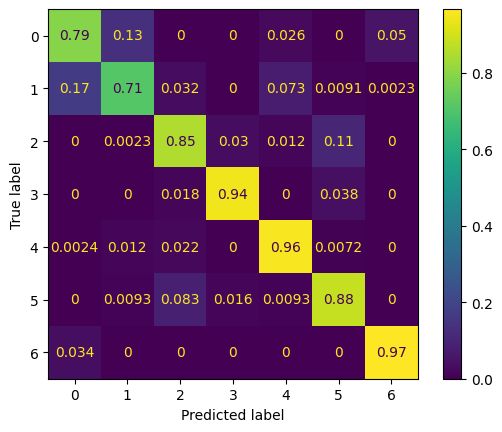

In [108]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(yTest, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [109]:
import joblib
joblib.dump(best_model, 'forest_model.pkl')


['forest_model.pkl']